In [1]:
import pandas as pd
import os
import sys
import time
%matplotlib inline
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import randint
from networkx.algorithms import community

In [2]:
adjacency_list_df = pd.read_csv('adjacency_list.csv')

In [3]:
adjacency_list_df.head()

,start_node,end_node
0,Charles Ans,Nanpa Básico
1,Charles Ans,Rapsusklei
2,Charles Ans,BCN
3,Charles Ans,Neto Peña
4,Charles Ans,Gordo del Funk


In [5]:
# Graph creation:

G = nx.from_pandas_edgelist(adjacency_list_df, 'start_node', 'end_node')

### Visualizing the graph


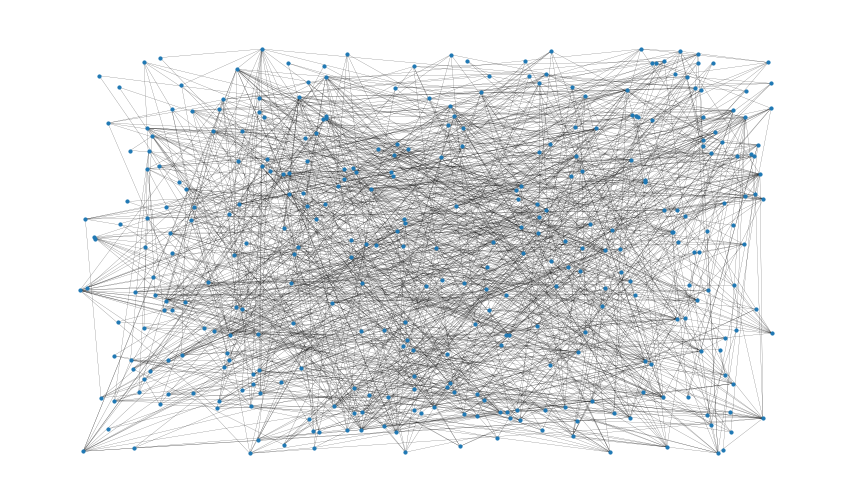

In [6]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis('off')
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G, pos=nx.random_layout(G), ax=ax, **plot_options)

we will limit the number of iterations used in the spring_layout function to reduce the computation time. We will also save the computed layout so we can use it for future visualizations.

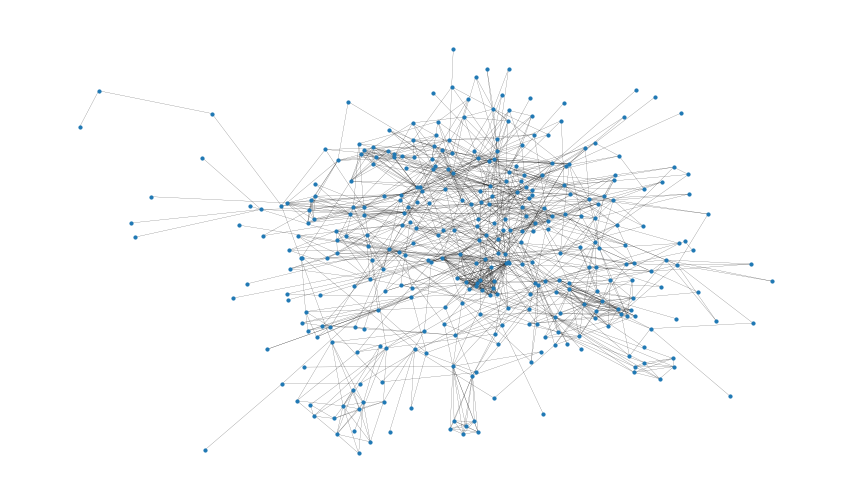

In [7]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis('off')
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)

In [9]:
# Total number of nodes in network:

print('Total number of nodes in network:', G.number_of_nodes())

# Total number of edges:

print('Total number of edges:', G.number_of_edges())

# Also, the average degree of a node can be seen.
# On average, a node is connected to almost 7 other nodes, also known as neighbors of the node.
# This has been calculated by creating a list of all the degrees of the nodes and using numpy.array
# to find the mean of the created list.

print('On average, a node is connected to almost', np.mean([d for _, d in G.degree()]), 'other nodes')


Total number of nodes in network: 339
Total number of edges: 1185
On average, a node is connected to almost 6.991150442477876 other nodes


## Shortest Paths

In [16]:
# computing the shortest path length for all pairs of nodes in the network:
# here we attain all the artists and the number of nodes that they have to go through to get to certain parts of the network

shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))

In [12]:
# This is equivalent to diameter = nx.diameter(G), but much more efficient since we're
# reusing the pre-computed shortest path lengths!

diameter = max(nx.eccentricity(G, sp=shortest_path_lengths).values())
diameter

10

In [13]:
# the average path length is found. Again, we could use nx.average_shortest_path_length to compute this directly,
# but it’s much more efficient to use the shortest_path_length that we’ve already computed:

# Compute the average shortest path length for each node
average_path_lengths = [
    np.mean(list(spl.values())) for spl in shortest_path_lengths.values()
]
# The average over all nodes
np.mean(average_path_lengths)

4.147318592772427

In [14]:
# This represents the average of the shortest path length for all pairs of nodes: in order to
# reach from one node to another node, roughly 4.1 edges will be traversed on average.

Text(0, 0.5, 'Frequency (%)')

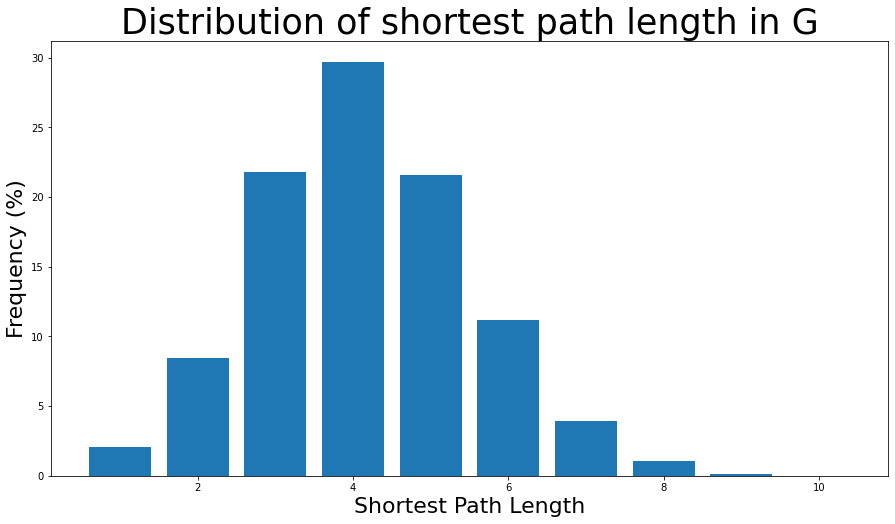

In [15]:
# We know the maximum shortest path length (the diameter), so create an array
# to store values from 0 up to (and including) diameter
path_lengths = np.zeros(diameter + 1, dtype=int)

# Extract the frequency of shortest path lengths between two nodes
for pls in shortest_path_lengths.values():
    pl, cnts = np.unique(list(pls.values()), return_counts=True)
    path_lengths[pl] += cnts

# Express frequency distribution as a percentage (ignoring path lengths of 0)
freq_percent = 100 * path_lengths[1:] / path_lengths[1:].sum()

# Plot the frequency distribution (ignoring path lengths of 0) as a percentage
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(np.arange(1, diameter + 1), height=freq_percent)
ax.set_title(
    'Distribution of shortest path length in G', fontdict ={'size': 35}, loc='center'
)
ax.set_xlabel('Shortest Path Length', fontdict ={'size': 22})
ax.set_ylabel('Frequency (%)', fontdict ={'size': 22})

## Shortest path tool

In [61]:
# We randomly chose an artist

shortest_path_lengths['Charles Ans']

{'Charles Ans': 0,
 'Rapsusklei': 1,
 'Gordo del Funk': 1,
 'Neto Peña': 1,
 'Sabino': 1,
 'Yoss Bones': 1,
 'Nanpa Básico': 1,
 'BCN': 1,
 'Gera MX': 1,
 'Sharif': 1,
 'ToteKing': 2,
 'JazzWoman': 2,
 'La Raíz': 2,
 'Accion Sanchez': 2,
 'Machete en Boca': 2,
 'Sara Hebe': 2,
 'Los Chikos del Maiz': 2,
 'Homes Llúdriga': 2,
 'Homer El Mero Mero': 2,
 'Def Con Dos': 2,
 'Clara Peya': 2,
 'Juaninacka': 2,
 'César López': 2,
 'Snow Tha Product': 2,
 'Solo Soul': 2,
 'Antonio Torres': 2,
 'Rels B': 2,
 'Elphomega': 2,
 'Toteking': 2,
 'Jose Macario': 2,
 'Roger Martinez': 2,
 'Noult': 2,
 'Neutro Shorty': 2,
 'Hazhe': 2,
 'Juan Pablo Balcazar': 2,
 'Sr. Wilson': 2,
 'McKlopedia': 2,
 'Akapellah': 2,
 'Tribade': 2,
 'Canserbero': 2,
 'Blake': 2,
 'Microbio': 2,
 'Easy-S': 3,
 'Bizarrap': 3,
 'C.R.O': 3,
 'Bhavi': 3,
 'Elane': 3,
 'Foyone': 3,
 'Dj Akrylik': 3,
 'Anier': 3,
 'Hoke': 3,
 'IRA': 3,
 'Adala': 3,
 'J Dose': 3,
 'Kutxi Romero': 3,
 'Eladio Carrion': 3,
 'Shotta': 3,
 'Santa Salu

In [122]:
# lets check the path from 'Xmaga' to 'Charles Ans'
# Source: https://networkx.org/documentation/networkx-1.9/reference/generated/networkx.algorithms.simple_paths.all_simple_paths.html

# These are all the possible paths of the network with a cutoff of 8.
# The more nodes in the middle to reach to an artist the more possible routes there are
# thereby we apply a cutoff, otherwise it would be way too much

paths = nx.all_simple_paths(G, source='Xmaga', target='Charles Ans', cutoff= 8)
paths_posibilities = list(paths)

In [123]:
len(paths_posibilities)

74

We are creating a Dataframe with all the possible routes and within them the means and std dev of their respective popularities

In [125]:
all_paths_std_mean = list()

for route in paths_posibilities:
    artist_route = list()
    for artist in route:
        artist_route.append(df_communities[df_communities['Id'] == artist]['popularity'].values[0])
    all_paths_std_mean.append((tuple(route),np.array(artist_route).mean(),np.array(artist_route).std()))

In [126]:
df_best_route = pd.DataFrame(all_paths_std_mean, columns = ['route', 'mean', 'standard_dev'])

Here the idea is to grab the routes with the highest popularity and lowest std deviation in order to find the most popular artists which are all more or less in the same level. This will increase the likelihood of a greater impact with the artist that we are trying to reach.

In [127]:
df_best_route.describe()

,mean,standard_dev
count,74.000000,74.000000
mean,54.433934,14.957801
std,2.792816,1.387626
min,49.444444,12.138094
25%,52.361111,13.802397
50%,54.277778,14.735529
75%,56.194444,16.118957
max,60.555556,17.586471


In [130]:
# For this case, the following routes would be the optimal ones. 
# From here we should consider with the artists which are
# the best approaches

df_best_route[(df_best_route['mean'] > 53) & (df_best_route['standard_dev'] < 14)]

,route,mean,standard_dev
5,"(Xmaga, Da Silva, Kream, Clas Beats, El Jincho...",54.333333,13.012814
30,"(Xmaga, Matasvandals, Kream, Clas Beats, El Ji...",53.222222,13.660794
33,"(Xmaga, Matasvandals, Kream, Clas Beats, El Ji...",55.111111,13.955839
35,"(Xmaga, Matasvandals, Kream, Clas Beats, El Ji...",54.777778,12.856281
40,"(Xmaga, Matasvandals, Kream, Clas Beats, El Ji...",55.111111,13.955839
62,"(Xmaga, Mauri, Blessed013, Lopes, El Jincho, W...",53.333333,13.556466
63,"(Xmaga, Mauri, Blessed013, Lopes, El Jincho, W...",53.222222,13.628221
69,"(Xmaga, Mauri, Blessed013, Lopes, El Jincho, N...",53.333333,13.556466
70,"(Xmaga, Mauri, Blessed013, Lopes, El Jincho, N...",53.222222,13.628221


In [17]:
# Route number 35 would be the best choice. But at the end of the day it's also the artist's call to chose the most
# favorable route

## Centrality measures

#### Degree Centrality

Degree centrality asigns an importance score based simply on the number of links held by each node. In this analysis, that means that the higher the degree centrality of a node is, the more edges are connected to the particular node and thus the more neighbor nodes (colaborations) this node has. In fact, the degree of centrality of a node is the fraction of nodes it is connected to. In other words, it is the percentage of the network that the particular node is connected to meaning colaborating with.

Starting, we find the nodes with the highest degree centralities. Specifically, the nodes with the 8 highest degree centralities are shown below together with the degree centrality:

In [18]:
degree_centrality = nx.centrality.degree_centrality(G)  # save results in a variable to use again 
(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

[('Rapsusklei', 0.07988165680473372),
 ('Foyone', 0.07692307692307693),
 ('Shotta', 0.07692307692307693),
 ('Tribade', 0.06804733727810651),
 ('Bizarrap', 0.0650887573964497),
 ('Nacho', 0.05917159763313609),
 ('Nach', 0.05917159763313609),
 ('Sceno', 0.05917159763313609)]

That means that node Rapsusklei has the highest degree centrality with 0.079, meaning that this artist has colaborations with around the 7.9% of the whole network. Similarly, nodes Foyone,Shotta,Tribado & Bizzarap also have very high degree centralities.

In [19]:
# We start the DF for all important variables

df_variables = pd.DataFrame(degree_centrality.items(), columns= ['name','degree_centrality'])

In [20]:
df_variables.head()

,name,degree_centrality
0,Charles Ans,0.026627
1,Nanpa Básico,0.011834
2,Rapsusklei,0.079882
3,BCN,0.017751
4,Neto Peña,0.020710


In [21]:
number_of_nodes = list()

for i in G.degree:
    number_of_nodes.append(i[1])


In [22]:
df_variables['num_of_edges'] = number_of_nodes

In [23]:
df_variables.head()

,name,degree_centrality,num_of_edges
0,Charles Ans,0.026627,9
1,Nanpa Básico,0.011834,4
2,Rapsusklei,0.079882,27
3,BCN,0.017751,6
4,Neto Peña,0.020710,7


Now we can also see the number of neighbors for the nodes with the highest degree centralities:

In [24]:
(sorted(G.degree, key=lambda item: item[1], reverse=True))[:8]

[('Rapsusklei', 27),
 ('Foyone', 26),
 ('Shotta', 26),
 ('Tribade', 23),
 ('Bizarrap', 22),
 ('Nacho', 20),
 ('Nach', 20),
 ('Sceno', 20)]

Text(0, 0.5, 'Counts')

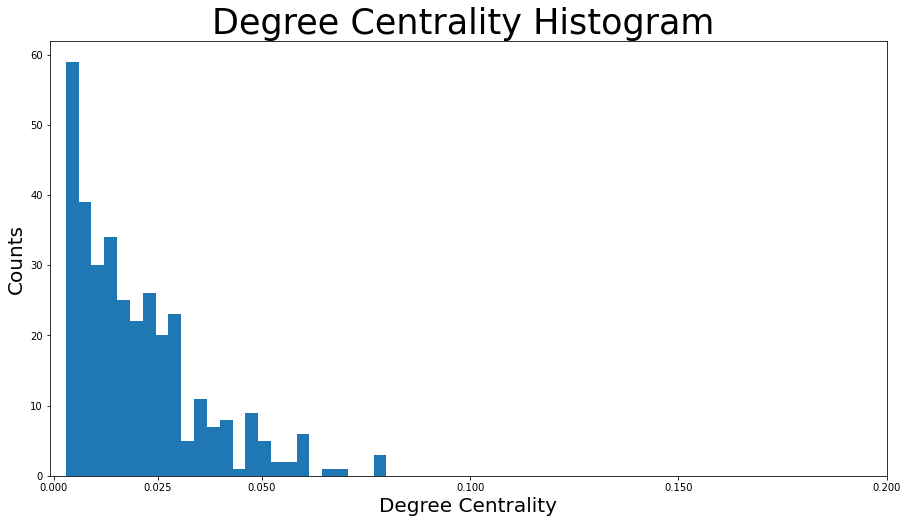

In [25]:
# Now the distribution of degree centralities will be plotted:

plt.figure(figsize=(15,8))
plt.hist(degree_centrality.values(), bins=25)
plt.xticks(ticks=[0, 0.025, 0.05, 0.1, 0.15, 0.2])  # set the x axis ticks
plt.title('Degree Centrality Histogram ', fontdict ={'size': 35}, loc='center') 
plt.xlabel('Degree Centrality', fontdict ={'size': 20})
plt.ylabel('Counts',fontdict ={'size': 20})

It is visible that the vast majority of artists have degree centralities of less than 0.03 (roughly). In fact the majority has less than 0.01. Actually, that makes sense because not all artists in this community which necessarily collaborate in their top tracks. Many are individual songs from a new album or they have been running a solo career. However it is noticeable that the most famous artists (higher views, followers, popularity... are those with most collaborators).


(-1.1853973708414394,
 0.9510866169503848,
 -1.0275543647460128,
 1.0103476010874686)

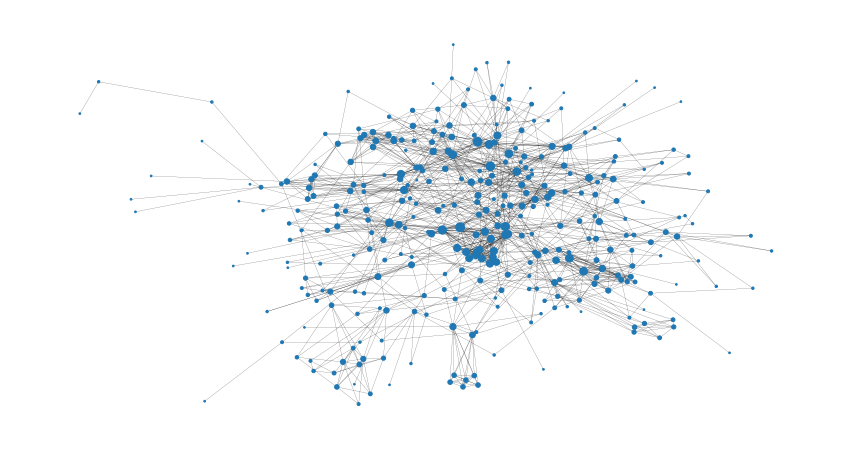

In [26]:
# Now let’s check the users with highest degree centralities from the size of their nodes:

node_size =  [v * 1000 for v in degree_centrality.values()]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15,8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis('off')

#### Betweenness Centrality

Betweenness centrality measures the number of times a node lies on the shortest path between other nodes, meaning it acts as a bridge. In detail, betweenness centrality of a node v is the percentage of all the shortest paths of any two nodes (apart from v), which pass through v. Specifically, in the rappers graph this measure is associated with the user’s ability to collaborate with others. A user with a high betweenness centrality acts as a bridge to many users that are not collaborating and thus has the ability to influence them by conveying information or even connect them via the user’s circle (which would reduce the user’s betweenness centrality after).

Now, the nodes with the 8 highest betweenness centralities will be calculated and shown with their centrality values:

In [27]:
betweenness_centrality = nx.centrality.betweenness_centrality(G)  # save results in a variable to use again 
(sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

[('Shotta', 0.10544818079396756),
 ('Foyone', 0.09147142189180622),
 ('C. Tangana', 0.08719068821906069),
 ('Bizarrap', 0.0777749372401585),
 ('El Jincho', 0.07405643881409028),
 ('Kase.O', 0.07215738226886648),
 ('Sceno', 0.06524978707691585),
 ('ToteKing', 0.05634500962859327)]

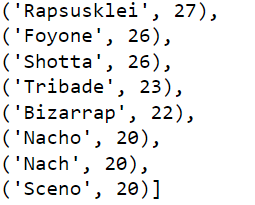

Looking at the results, the node Shotta has a betweenness centrality of 0.10, meaning it lies on 1/10 of the total shortest paths between other nodes. Also, combining the knowledge of the degree centrality.

Nodes Foyone, Shotta, Bizarrap & Sceno have both the highest degree and betweenness centralities and are spotlight nodes. That indicates that those nodes are both the most popular ones in this network and can also influence and spread information in the network.

Nodes El Jincho, ToteKing are not spotlight nodes, have some of the highest betweenness centralities and have not the highest degree centralities. That means that even though those nodes are not the most popular users in the network, they have the most influence in this network among artists of spotlight nodes when it comes to spreading information.

Node C. Tangana is a spotlight node as it has a very high betweenness centrality even though it doesn’t have the highest degree centralities. In other words, this node does not have a very collaborative network. However, the user’s whole list of collaborations is a part of the network and thus the user could connect different circles in this network by being the middleman.

In [28]:
df_variables['betweenness_centrality'] = betweenness_centrality.values()

In [29]:
df_variables.head()

,name,degree_centrality,num_of_edges,betweenness_centrality
0,Charles Ans,0.026627,9,0.006667
1,Nanpa Básico,0.011834,4,0.000929
2,Rapsusklei,0.079882,27,0.039389
3,BCN,0.017751,6,0.000430
4,Neto Peña,0.020710,7,0.002914


Text(0, 0.5, 'Counts')

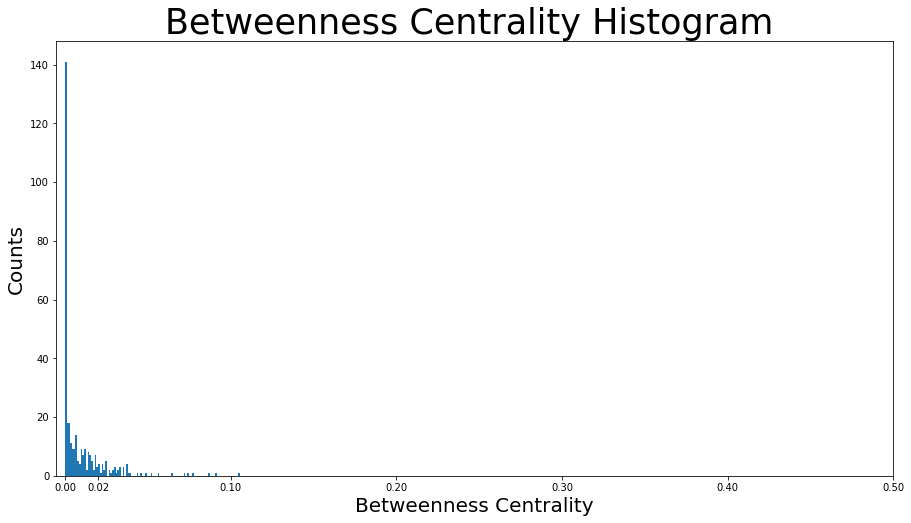

In [31]:
#Moving on, the distribution of betweenness centralities will be plotted:

plt.figure(figsize=(15,8))
plt.hist(betweenness_centrality.values(), bins=100)
plt.xticks(ticks=[0, 0.02, 0.1, 0.2, 0.3, 0.4, 0.5])  # set the x axis ticks
plt.title('Betweenness Centrality Histogram ', fontdict ={'size': 35}, loc='center') 
plt.xlabel('Betweenness Centrality', fontdict ={'size': 20})
plt.ylabel('Counts',fontdict ={'size': 20})

Here we can clearly see that many nodes act as bridges in our network eventhough (which is expected) most don't act as bridges

(-1.1853973708414394,
 0.9510866169503848,
 -1.0275543647460128,
 1.0103476010874686)

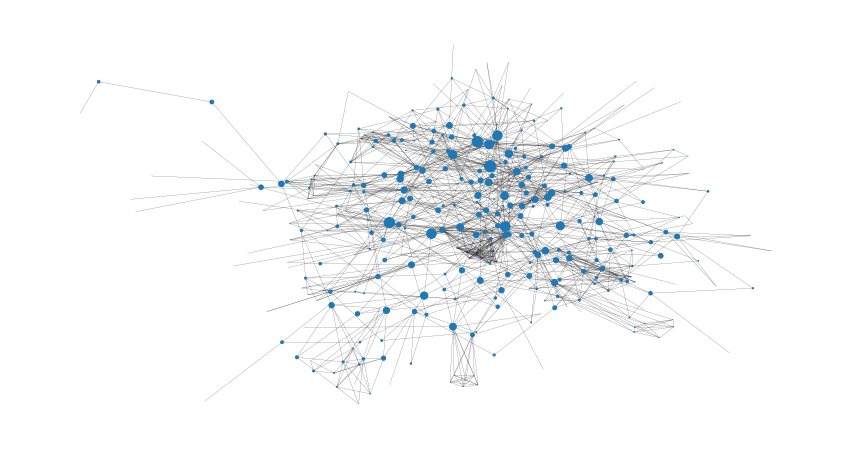

In [32]:
# We can also get an image on the nodes with the highest betweenness centralities and where they are located in the network. 
# It is clear that they are the bridges from one community to another:

node_size =  [v * 1200 for v in betweenness_centrality.values()]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15,8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis('off')

#### Closeness Centrality

Closeness centrality scores each node based on their ‘closeness’ to all other nodes in the network. For a node v, its closeness centrality measures the average farness to all other nodes. In other words, the higher the closeness centrality of v, the closer it is located to the centre of the network.

The closeness centrality measure is very important for marketing campaigns or beef between artists. Let’s examine the example of marketing campaigns. If a company wanted to start a marketing campaign with a community it should contact the artists with highest closeness centrality in order to spread it out within the network. However, if it was done in a user with very low closeness centrality then the spread of the marketing campaign won't reach as many people.

The nodes with the highest closeness centralities will be found now:


In [33]:
closeness_centrality = nx.centrality.closeness_centrality(G)  # save results in a variable to use again 
(sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

[('Foyone', 0.3456032719836401),
 ('Sceno', 0.336318407960199),
 ('ToteKing', 0.33169774288518156),
 ('Shotta', 0.32221163012392756),
 ('Natos', 0.3197729422894986),
 ('Waor', 0.31916902738432484),
 ('Homer El Mero Mero', 0.3173708920187793),
 ('FERNANDOCOSTA', 0.316776007497657)]

In [34]:
df_variables['closeness_centrality'] = closeness_centrality.values()

In [35]:
df_variables.head()

,name,degree_centrality,num_of_edges,betweenness_centrality,closeness_centrality
0,Charles Ans,0.026627,9,0.006667,0.248529
1,Nanpa Básico,0.011834,4,0.000929,0.241601
2,Rapsusklei,0.079882,27,0.039389,0.261813
3,BCN,0.017751,6,0.000430,0.222368
4,Neto Peña,0.020710,7,0.002914,0.246356


Text(0, 0.5, 'Counts')

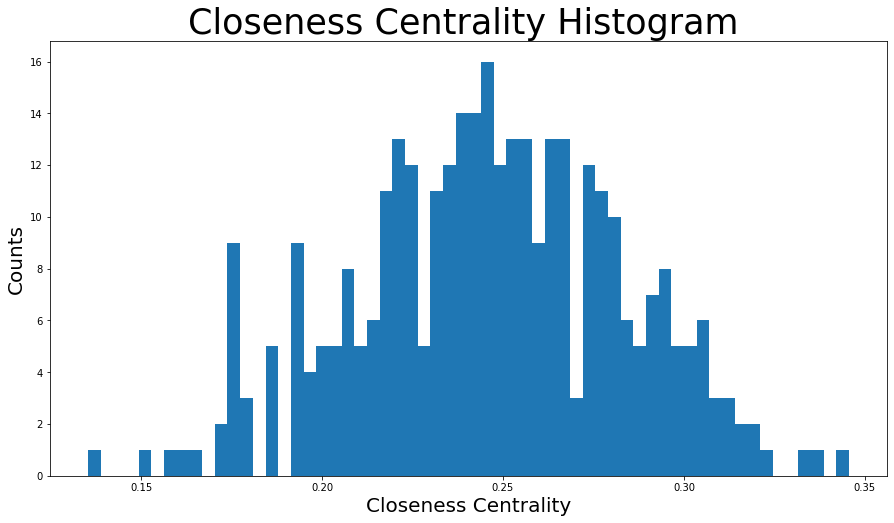

In [36]:
#Furthermore, the distribution of the closeness centralities:

plt.figure(figsize=(15,8))
plt.hist(closeness_centrality.values(), bins=60)
plt.title('Closeness Centrality Histogram ', fontdict ={'size': 35}, loc='center') 
plt.xlabel('Closeness Centrality', fontdict ={'size': 20})
plt.ylabel('Counts',fontdict ={'size': 20})

(-1.1853973708414394,
 0.9510866169503848,
 -1.0275543647460128,
 1.0103476010874686)

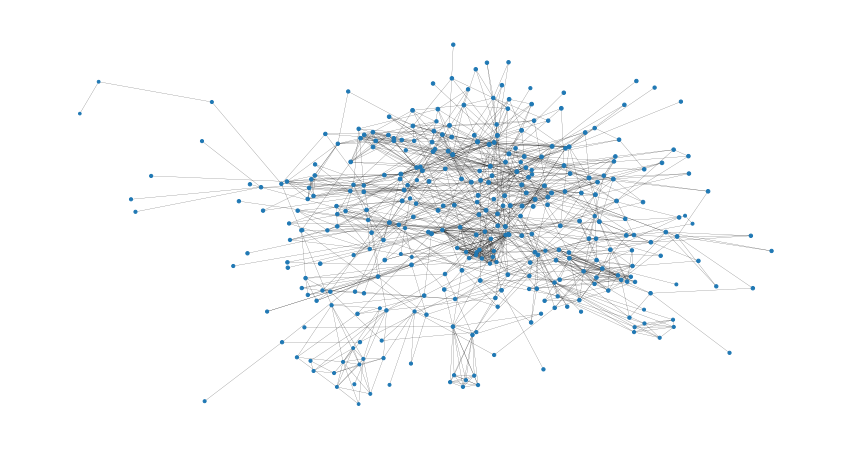

In [38]:
node_size =  [v * 50 for v in closeness_centrality.values()]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15,8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis('off')

#### Eigenvector Centrality

Eigenvector centrality is the metric to show how connected a node is to other important nodes in the network. It measures a node’s influence based on how well it is connected inside the network and how many links its connections have and so on. This measure can identify the nodes with the most influence over the whole network. A high eigenvector centrality means that the node is connected to other nodes who themselves have high eigenvector centralities. In this facebook analysis, the measure is associated with the users ability to influence the whole graph and thus the users with the highest eigenvector centralities are the most important nodes in this network.

The nodes with the highest eigenvector centralities will be examined now:

In [39]:
eigenvector_centrality = nx.centrality.eigenvector_centrality(G)  # save results in a variable to use again 
(sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True))[:10]

[('Tribade', 0.2536975453317921),
 ('Los Chikos del Maiz', 0.24782213801280545),
 ('JazzWoman', 0.2450683567029741),
 ('Elphomega', 0.2450173013058956),
 ('Homes Llúdriga', 0.2448264663101504),
 ('Machete en Boca', 0.24385993592028118),
 ('Noult', 0.24371491737207743),
 ('La Raíz', 0.24271996977962818),
 ('Antonio Torres', 0.24271996977962818),
 ('Sara Hebe', 0.24271996977962818)]

In [40]:
df_variables['eigenvector_centrality'] = eigenvector_centrality.values()

Text(0, 0.5, 'Counts')

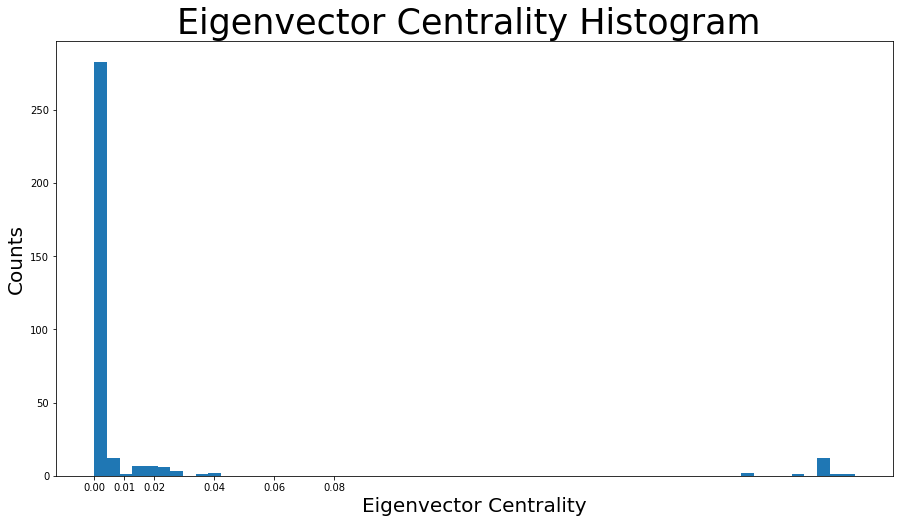

In [41]:
plt.figure(figsize=(15,8))
plt.hist(eigenvector_centrality.values(), bins=60)
plt.xticks(ticks=[0, 0.01, 0.02, 0.04, 0.06, 0.08])  # set the x axis ticks
plt.title('Eigenvector Centrality Histogram ', fontdict ={'size': 35}, loc='center') 
plt.xlabel('Eigenvector Centrality', fontdict ={'size': 20})
plt.ylabel('Counts',fontdict ={'size': 20})

(-1.1853973708414394,
 0.9510866169503848,
 -1.0275543647460128,
 1.0103476010874686)

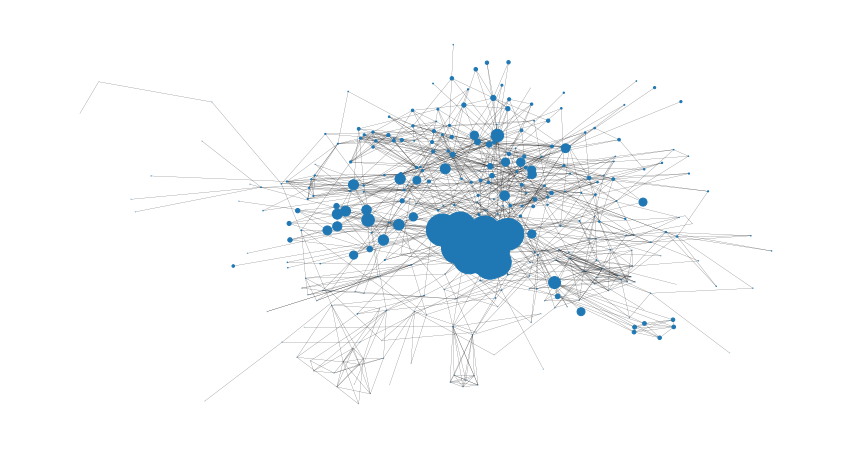

In [42]:
node_size =  [v * 4000 for v in eigenvector_centrality.values()]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15,8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis('off')

#### Page Rank

Returns the PageRank of the nodes in the graph.

PageRank computes a ranking of the nodes in the graph G based on the structure of the incoming links. It was originally designed as an algorithm to rank web pages.

The PageRank algorithm was designed for directed graphs but this algorithm does not check if the input graph is directed and will execute on undirected graphs by converting each edge in the directed graph to two edges.


In [46]:
pr = nx.pagerank(G, alpha=0.9)

In [47]:
(sorted(pr.items(), key=lambda item: item[1], reverse=True))[:10]

[('C. Tangana', 0.010264472739081326),
 ('Shotta', 0.01021907199139277),
 ('Foyone', 0.009727526684042252),
 ('Bizarrap', 0.008869094607139697),
 ('Rapsusklei', 0.008371356368482196),
 ('Nacho', 0.007882313157305216),
 ('FERNANDOCOSTA', 0.007850107649876016),
 ('Nach', 0.007772286778886416),
 ('Haze', 0.007587621735772058),
 ('Sceno', 0.007573759243975022)]

In [48]:
df_variables['page_rank'] = pr.values()

With the results of the Page rank we can also figure out that C. Tangana is a Spotlight node.


Text(0, 0.5, 'Counts')

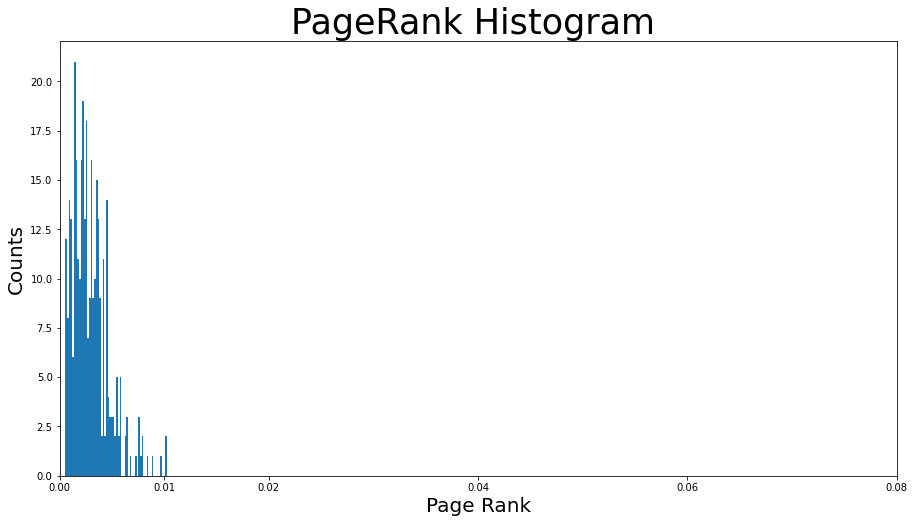

In [51]:
plt.figure(figsize=(15,8))
plt.hist(pr.values(), bins=60)
plt.xticks(ticks=[0, 0.01, 0.02, 0.04, 0.06, 0.08])  # set the x axis ticks
plt.title('PageRank Histogram ', fontdict ={'size': 35}, loc='center') 
plt.xlabel('Page Rank', fontdict ={'size': 20})
plt.ylabel('Counts',fontdict ={'size': 20})

(-1.1853973708414394,
 0.9510866169503848,
 -1.0275543647460128,
 1.0103476010874686)

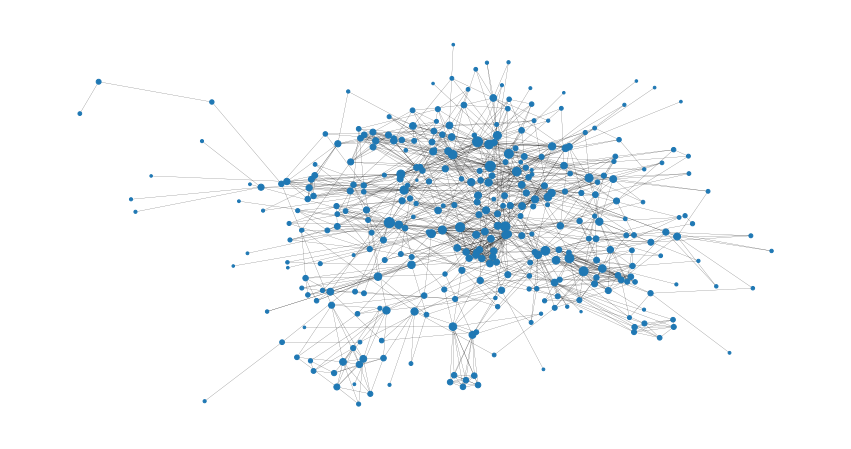

In [53]:
node_size =  [v * 10000 for v in pr.values()]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15,8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis('off')

#### Clustering Effects

The clustering coefficient of a node v is defined as the probability that two randomly selected artists of v are colaborators. As a result, the average clustering coefficient is the average of clustering coefficients of all the nodes. The closer the average clustering coefficient is to v, the more complete the graph will be because there’s just one giant component. Lastly, it is a sign of triadic closure because the more complete the graph is, the more triangles will usually arise.



In [54]:
nx.average_clustering(G)


0.443102563679693

Text(0, 0.5, 'Counts')

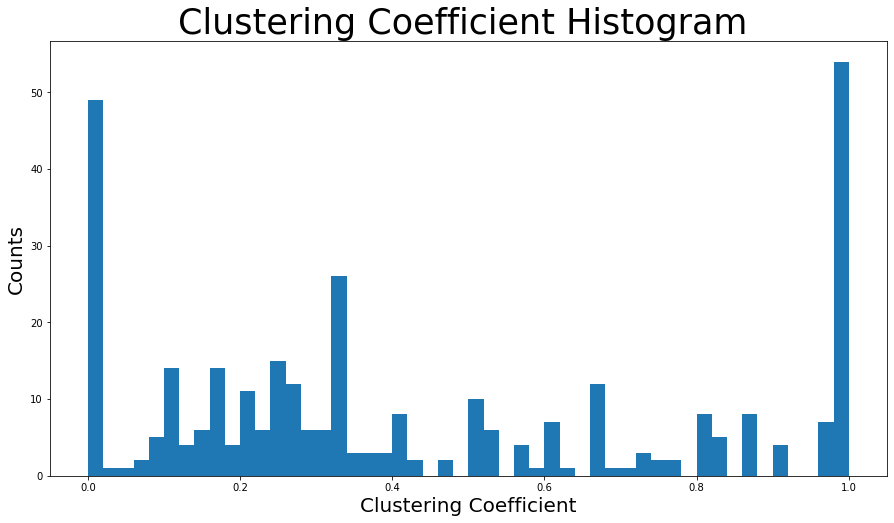

In [55]:
plt.figure(figsize=(15,8))
plt.hist(nx.clustering(G).values(), bins=50)
plt.title('Clustering Coefficient Histogram ', fontdict ={'size': 35}, loc='center') 
plt.xlabel('Clustering Coefficient', fontdict ={'size': 20})
plt.ylabel('Counts',fontdict ={'size': 20})

In [56]:
# The number of unique triangles in the network are found next:

triangles_per_node = list(nx.triangles(G).values())
print(sum(triangles_per_node) / 3)  # divide by 3 because each triangle is counted once for each node

# Now the average number of triangles that a node is a part of:

print(np.mean(triangles_per_node))

# Due to having some nodes that belong to a great many triangles, the metric of median will give us a better understanding:

print(np.median(triangles_per_node))

1592.0
14.08849557522124
5.0


#### Bridges

First of all, an edge joining two nodes A and B in the graph is considered a bridge, if deleting the edge would cause A and B to lie in two different components. Now it is checked if there are any bridges in this network:

In [57]:
bridges = list(nx.bridges(G))
len(bridges)

31

In [58]:
local_bridges = list(nx.local_bridges(G, with_span=False))
len(local_bridges)

168

(-1.1853973708414394,
 0.9510866169503848,
 -1.0275543647460128,
 1.0103476010874686)

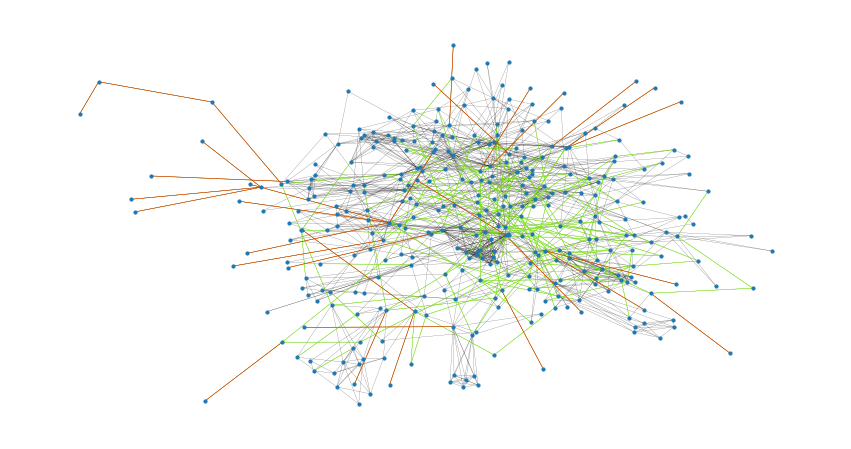

In [59]:
plt.figure(figsize=(15,8))
nx.draw_networkx(G, pos=pos, node_size=10, with_labels=False, width=0.15)
nx.draw_networkx_edges(G, pos, edgelist=local_bridges, width=0.5, edge_color="lawngreen")  # green color for local bridges 
nx.draw_networkx_edges(G, pos, edgelist=bridges, width=0.5, edge_color="r")  # red color for bridges
plt.axis('off')

#### Assortativity
Assortativity describes the preference for a network’s nodes to attach to others that are similar in some way.

The assortativity in terms of nodes degrees is found with two ways:

In [60]:
nx.degree_assortativity_coefficient(G)

0.12459201743007287

In [61]:
nx.degree_pearson_correlation_coefficient(G)  # use the potentially faster scipy.stats.pearsonr function.


0.1245920174300725

#### Network Communities

A community is a group of nodes, so that nodes inside the group are connected with many more edges than between groups. Two different algorithms will be used for communities detection in this network

Firstly, a semi-synchronous label propagation method is used to detect the communities.

This function determines by itself the number of communities that will be detected. Now the communities will be iterated through and a colors list will be created to contain the same color for nodes that belong to the same community. Also, the number of communities is printed:

In [87]:
# Current Dataframe

df_variables.head()

,name,degree_centrality,num_of_edges,betweenness_centrality,closeness_centrality,eigenvector_centrality,page_rank
0,Charles Ans,0.026627,9,0.006667,0.248529,0.020963,0.003390
1,Nanpa Básico,0.011834,4,0.000929,0.241601,0.004618,0.001662
2,Rapsusklei,0.079882,27,0.039389,0.261813,0.233407,0.008371
3,BCN,0.017751,6,0.000430,0.222368,0.019832,0.002334
4,Neto Peña,0.020710,7,0.002914,0.246356,0.007073,0.002725


In [88]:
# df_variables.to_csv('graph_metrics.csv', index=False)

In [89]:
# Usar Gephi

In [90]:
# Bring in the gephi dataset to grab de modularity class
df_gephi = pd.read_csv('gephi_df.csv')

In [91]:
df_gephi.shape

(339, 13)

In [92]:
(df_gephi['modularity_class'].unique())

array([ 0,  1,  8, 11,  6,  2,  5,  7,  9,  3,  4, 10, 12], dtype=int64)

In [93]:
df_gephi1 = df_gephi[['Id','modularity_class','stat_inf_class']] 

In [95]:
# We grab what is of interest to us from gephi metrics

df_gephi1

,Id,modularity_class,stat_inf_class
0,Dualy,0,9
1,Hard GZ,0,9
2,Miranda,0,9
3,Anier,1,2
4,Nikone,0,9
...,...,...,...
334,Escoberito,8,9
335,César López,9,2
336,Stylo G,11,14
337,Bombony Montana,4,10


In [102]:
# Bringing in the DataFrame with Popularity, followers and Genres

df_all_metrics = pd.read_csv('df_all_metrics.csv')

In [103]:
df_all_metrics.head()

,name,degree_centrality,betweenness_centrality,closeness_centrality,page_rank,popularity,followers,genres
0,Charles Ans,0.026627,0.006667,0.248529,0.003390,74,1104527,"['latin hip hop', 'mexican hip hop', 'perreo',..."
1,Nanpa Básico,0.011834,0.000929,0.241601,0.001662,76,1585468,"['colombian hip hop', 'mexican hip hop']"
2,Rapsusklei,0.079882,0.039389,0.261813,0.008371,57,301652,"['boom bap espanol', 'rap conciencia', 'spanis..."
3,BCN,0.017751,0.000430,0.222368,0.002334,57,2933,[]
4,Neto Peña,0.020710,0.002914,0.246356,0.002725,77,821168,['mexican hip hop']


In [104]:
# We merge both dataframes

df_communities = df_all_metrics.merge(df_gephi1, left_on='name', right_on='Id')

In [105]:
df_communities.shape

(339, 11)

In [107]:
df_communities.head()

,name,degree_centrality,betweenness_centrality,closeness_centrality,page_rank,popularity,followers,genres,Id,modularity_class,stat_inf_class
0,Charles Ans,0.026627,0.006667,0.248529,0.003390,74,1104527,"['latin hip hop', 'mexican hip hop', 'perreo',...",Charles Ans,9,20
1,Nanpa Básico,0.011834,0.000929,0.241601,0.001662,76,1585468,"['colombian hip hop', 'mexican hip hop']",Nanpa Básico,9,20
2,Rapsusklei,0.079882,0.039389,0.261813,0.008371,57,301652,"['boom bap espanol', 'rap conciencia', 'spanis...",Rapsusklei,9,2
3,BCN,0.017751,0.000430,0.222368,0.002334,57,2933,[],BCN,9,20
4,Neto Peña,0.020710,0.002914,0.246356,0.002725,77,821168,['mexican hip hop'],Neto Peña,9,20


In [108]:
df_communities.columns

Index(['name', 'degree_centrality', 'betweenness_centrality',
       'closeness_centrality', 'page_rank', 'popularity', 'followers',
       'genres', 'Id', 'modularity_class', 'stat_inf_class'],
      dtype='object')

In [109]:
df_communities.drop(['Id','stat_inf_class'], axis = 1, inplace = True)

In [110]:
# We assign a name to the different communities

name_asig = {
0:'rap_new_school',
1:'indie_rap',
2:'gipsy_rap',
3:'mainstream_general',
4:'raperitos_under',
5:'trap_flamenco', 
6:'C.R.E.A.M',
7:'trap_ignorant',
8:'old_school',
9:'rap_latino',
10:'rap_new_school_chill',
11:'mainstream_latino',
12:'trap_lofi'}

In [111]:
df_communities['communities'] = df_communities['modularity_class'].map(name_asig)

In [112]:
df_communities.to_csv('df_metrics_communities.csv', index = False)

In [114]:
df_communities

,name,degree_centrality,betweenness_centrality,closeness_centrality,page_rank,popularity,followers,genres,modularity_class,communities
0,Charles Ans,0.026627,0.006667,0.248529,0.003390,74,1104527,"['latin hip hop', 'mexican hip hop', 'perreo',...",9,rap_latino
1,Nanpa Básico,0.011834,0.000929,0.241601,0.001662,76,1585468,"['colombian hip hop', 'mexican hip hop']",9,rap_latino
2,Rapsusklei,0.079882,0.039389,0.261813,0.008371,57,301652,"['boom bap espanol', 'rap conciencia', 'spanis...",9,rap_latino
3,BCN,0.017751,0.000430,0.222368,0.002334,57,2933,[],9,rap_latino
4,Neto Peña,0.020710,0.002914,0.246356,0.002725,77,821168,['mexican hip hop'],9,rap_latino
...,...,...,...,...,...,...,...,...,...,...
334,The Weeknd,0.002959,0.000000,0.194365,0.000862,97,43976282,"['canadian contemporary r&b', 'canadian pop', ...",3,mainstream_general
335,Canserbero,0.008876,0.000000,0.216251,0.001318,75,4375428,"['boom bap espanol', 'rap conciencia', 'venezu...",9,rap_latino
336,Tee Amara,0.008876,0.000000,0.231824,0.001418,41,117,[],0,rap_new_school
337,ULTRA,0.017751,0.000000,0.233910,0.002211,64,220606,"['dembow', 'dominican pop', 'rap dominicano', ...",1,indie_rap


In [78]:
# To chose the different classes:

df_communities_creator = df_communities[['name','genres','modularity_class']]

In [79]:
df_communities_creator.head()

,name,genres,modularity_class
0,Charles Ans,"['latin hip hop', 'mexican hip hop', 'perreo',...",9
1,Nanpa Básico,"['colombian hip hop', 'mexican hip hop']",9
2,Rapsusklei,"['boom bap espanol', 'rap conciencia', 'spanis...",9
3,BCN,[],9
4,Neto Peña,['mexican hip hop'],9


In [80]:
df_communities_creator[df_communities_creator['modularity_class'] == 12]

,name,genres,modularity_class
39,BxRod,[],12
40,Made in M,"['chillhop', 'lo-fi beats']",12
41,Cráneo,"['mexican hip hop', 'urbano espanol']",12
94,Juan Rios,['chillhop'],12
95,Lasser,[],12
96,Bejo,"['rap canario', 'urbano espanol']",12
117,Sr. Guayaba,[],12
118,Mucho Muchacho,['rap underground espanol'],12
208,LUNA KI,"['hyperpop en espanol', 'urbano espanol']",12
209,Cookin Soul,"['alternative hip hop', 'boom bap espanol', 't...",12


In [81]:
df_communities_creator['communities'] = df_communities_creator['modularity_class'].map(name_asig)

C:\Users\icarl\AppData\Local\Temp\ipykernel_27888\290594452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_communities_creator['communities'] = df_communities_creator['modularity_class'].map(name_asig)


In [82]:
df_communities_creator

,name,genres,modularity_class,communities
0,Charles Ans,"['latin hip hop', 'mexican hip hop', 'perreo',...",9,rap_latino
1,Nanpa Básico,"['colombian hip hop', 'mexican hip hop']",9,rap_latino
2,Rapsusklei,"['boom bap espanol', 'rap conciencia', 'spanis...",9,rap_latino
3,BCN,[],9,rap_latino
4,Neto Peña,['mexican hip hop'],9,rap_latino
...,...,...,...,...
334,The Weeknd,"['canadian contemporary r&b', 'canadian pop', ...",3,mainstream_general
335,Canserbero,"['boom bap espanol', 'rap conciencia', 'venezu...",9,rap_latino
336,Tee Amara,[],0,rap_new_school
337,ULTRA,"['dembow', 'dominican pop', 'rap dominicano', ...",1,indie_rap


In [ ]:
# Otras preguntas (EDA):
#  - cuales son los artistas con más colaboraciones?
#  - Cual es es el colaborador más solicitado
#  - hay alguna correlación con la popularidad?
#  - hay alguna correlación con los followers?
#  - Buscar el shortest path entre dos raperos (caminos)
#  - pintar las comunidades
#  - Page rank https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html
#  ranking de los artistas según el network

# grafos
#  - colabora si o no
#  - Cuantas veces colabora
#  - Popularidad de colaboraciones

# Matriz de adyacencia es la que te define el grafo en relaciones y nodos
# Un nodo puede relacionarse con si mismo
# la matriz de adyacencia te da toda la información entre todos los nodos
# biblioteca de python networkx (install)
# atriubutos: edge = artistas(relaciones), nodes
# pip install networkx

# documentation:
# modelo analisis de comunidades no supervisado en grafos
# https://networkx.org/nx-guides/content/exploratory_notebooks/facebook_notebook.html

# close up all metrics with NetworkX
# using the metrics analyse if the groups make sense
# ver diferencias entre modularity y inference
# EDA
# Habria que crear un EDA con los otros datos que proporciona Spotify

# possibilities:

# Hamiltonian Path
# Eucledian path


# ----------------------------------------------------------------------------------------------------------

# NLP
# Hacer práctica para el proyecto de música
# Usar Spotiscience para la letra y artista
# clutering de diferentes géneros
# Generar una canción con GPT3